# Hemuppgift 8

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from random import randint
from scipy.stats import norm

font = {'family' : 'dejaVu sans',
        'weight' : 'normal',
        'size'   : 14}
plt.rc('font', **font)

### Introduktion

Importera datafilen `pendel8.csv`.

In [3]:
data = np.genfromtxt('pendel8.csv', delimiter=',', skip_header=1, usecols = (2, 3, 4, 5))

Skapa variabler

In [4]:
l = data[:,0]
dl = data[:,1]
T = data[:,2]/10 
dT = data[:,3]/10

Beräkna g med osäkerhet enligt felfortplantningsfomeln. Se Hemuppgift 3 om du inte kommer ihåg fomlerna.

In [5]:
g = 4*np.pi**2*l/T**2
dg = np.sqrt((2*dT/T)**2+(dl/l)**2)*g

Beräkna medelvärde, standardavvikelse och medelvärdets standardavvikelse (Standard Error of Mean) för g

In [6]:
g_medel = np.mean(g)
g_std = np.std(g, ddof=1)
g_SEM = g_std/np.sqrt(np.size(g))
print(f'g = {np.around(g_medel,2)} ± {np.around(g_SEM,2)} kgm/s/s')

g = 9.63 ± 0.15 kgm/s/s


Gör en graf över värden på g med osäkerheter. Rita in medelvärdet standardavvikelsen och SEM som linjer.

Text(0.5, 1.0, 'Graf 1: Tyngdaccelerationen')

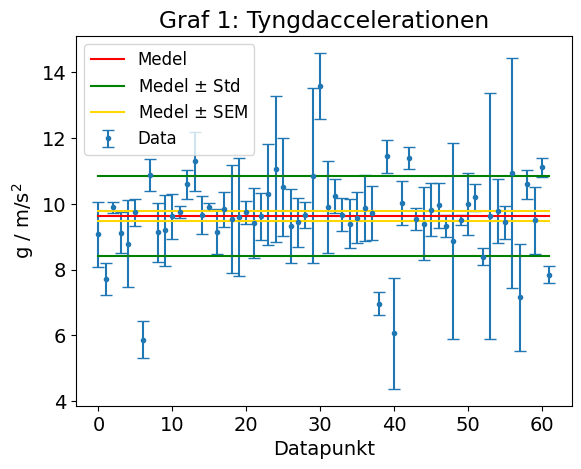

In [7]:
plt.errorbar(np.arange(len(g)),g,yerr=dg, capsize=4, fmt='.',label='Data')#######Ta bort
plt.plot(np.arange(len(g)),g_medel*np.ones(len(g)), 'r', label='Medel')
plt.plot(np.arange(len(g)),(g_medel-g_std)*np.ones(len(g)), 'g', label='Medel $\pm$ Std')
plt.plot(np.arange(len(g)),(g_medel+g_std)*np.ones(len(g)), 'g')
plt.plot(np.arange(len(g)),(g_medel-g_SEM)*np.ones(len(g)), 'gold', label='Medel $\pm$ SEM')
plt.plot(np.arange(len(g)),(g_medel+g_SEM)*np.ones(len(g)), 'gold')


plt.xlabel('Datapunkt')
plt.ylabel('g / m/s$^2$')
plt.legend(loc=2,prop={'size': 12})

plt.title('Graf 1: Tyngdaccelerationen')

### Uppgift 1 - Viktat medelvärde

Beräkna det viktade medelvärdet med funktionen `np.average(g, weights=w)` där $w = \frac{1}{dg^2}$

Uppskatta osäkerheten i det viktade medelvärdet genom att beräkna det viktade medelvärdets standardosäkerhet (Weighted Standard Error of the Mean):
$s_{\bar{X}} = \sqrt{\frac{\sum w_i(x_i - X)^2}{(N-1)\sum w_i}}$

Avrunda till lämpligt antal signifikanta siffror och skriv ut svaret med `print`.

In [8]:
w = 1/dg**2

weighted_average = np.average(g, weights=w)

print(f'viktat medelvärde {weighted_average.round(2)}')


viktat medelvärde 9.64


### Uppgift 2 - Avvikande värden

Som du ser har vi några datapunkter som avviker ganska mycket ifrån medelvärdet. Välj ett av värdena (kan göras med `g[i]`, där i är värdets possition i arrayen) och beräkna dess t-värde.

Avrunda till lämpligt antal signifikanta siffror och skriv ut svaret med `print`.

In [51]:
def t(input_array):
    return (input_array - input_array.mean()) / input_array.std()

tg = t(g)

print(tg[6].round(3))

1.028


För att avgöra sannolikheten att ett värde avviker så mycket som detta värde gör behöver vi fördelningsfunktionens värde i $t$, $\phi(t)$. Detta kan läsas av i tabeller, tex Physics Handbook. Alternativt kan sannolikheten beräknas med hjälp av bibliotekt `scipy`. Importera scipys funktion `norm` med:

`from scipy.stats import norm`

Sannolikheten att t är mindre är det värde du beräknat erhålls genom `norm.cdf(t)`.

(cfd står för 'cumulativ density function', dvs fördelningsfunktionen på svenska, och funktionen beräknar intergralen av den normaliserade normalfördelningen från $-\infty$ till *t*. Vill man ha en normalfördelning med andra parametrar kan man ange dessa med `norm.cdf(t, loc=medel, scale=std)` där *t* är det avvikande värdet.)

Vad är sannolikheten att mäta att värde som avviker (i absoluta tal) så här mycket från medelvärdet? Avrunda till lämpligt antal signifikanta siffror och skriv ut svaret med `print`.

In [52]:
def reliability(input_array):
    tt  = t(input_array)
    output = []
    for v in tt:
        output.append(2*(1 - norm.cdf(np.abs(v))))
    return np.array(output)

rg = reliability(g)

print(rg[6])


0.0017781262163136802


Använd Chauvenets kriterium för att avgöra om vi kan förkasta värdet.

In [53]:
print(rg[6] * np.size(g))

0.11024382541144817


*SVAR:* Då värdet övan är mindre än 0,5 kan vi förkasta detta värde

### Uppgift 3 - Medelvärden efter att vi förkastat outliers.

Värden som avviker mycket från resten av populationen kallas för *outliers*. Totalt finns tre outliers som uppfyller Chauvenets kriterium för att förkastas, värde nummer 6, 30 och 40.  Huruvida man bör göra detta eller ej är en omdiskuterad fråga. För sakens skulle provar vi att göra det för att se hur det påverkar resultatet.


Förkasta de avvikande värdena. Detta kan göras genom att skapa en ny array *g2* med:

`g2 = np.delete(g,[i,j,k])`

där i, j, k är de aktuella possitionerna för värdena som ska förkastas.

Glöm inte att också förkasta motsvarande värde i *dg*.

In [55]:
g2 = np.delete(g, [6,30,40])
dg2 = np.delete(dg, [6,30,40])

#### Vanligt medelvärde
Beräkna det oviktade medelvärdet med osäkerhet (SEM) baserat på *g2* och *dg2*.

Avrunda till lämpligt antal signifikanta siffror och skriv ut svaret med `print`.

In [58]:
g2_medel = np.mean(g2)
g2_std = np.std(g2, ddof=1)
g2_SEM = g2_std/np.sqrt(np.size(g))
print(f'g = {np.around(g_medel,2)} ± {np.around(g_SEM,2)} kgm/s/s')

g = 9.63 ± 0.15 kgm/s/s


Gör om grafen över värdena på g med osäkerheter och rita in det nya medelvärdet och medelvärdet ± en standardavvikelse som linjer. (Du kan kopiera koden högre upp och bara byta ut g mot g2, osv.)

Text(0.5, 1.0, 'Graf 1: Tyngdaccelerationen')

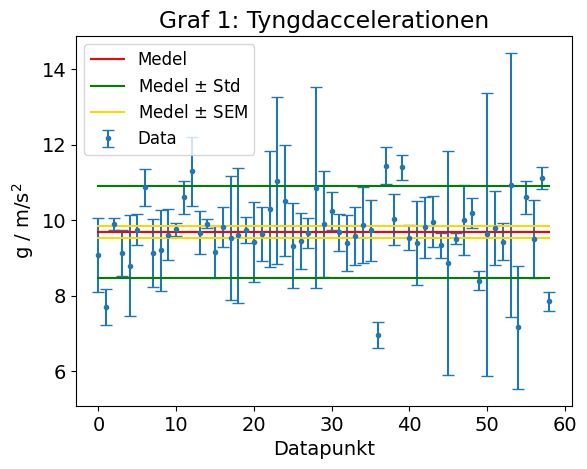

In [59]:
plt.errorbar(np.arange(len(g2)),g2,yerr=dg2, capsize=4, fmt='.',label='Data')#######Ta bort
plt.plot(np.arange(len(g2)),g2_medel*np.ones(len(g2)), 'r', label='Medel')
plt.plot(np.arange(len(g2)),(g2_medel-g_std)*np.ones(len(g2)), 'g', label='Medel $\pm$ Std')
plt.plot(np.arange(len(g2)),(g2_medel+g_std)*np.ones(len(g2)), 'g')
plt.plot(np.arange(len(g2)),(g2_medel-g_SEM)*np.ones(len(g2)), 'gold', label='Medel $\pm$ SEM')
plt.plot(np.arange(len(g2)),(g2_medel+g_SEM)*np.ones(len(g2)), 'gold')


plt.xlabel('Datapunkt')
plt.ylabel('g / m/s$^2$')
plt.legend(loc=2,prop={'size': 12})

plt.title('Graf 1: Tyngdaccelerationen')

#### Viktat medelvärde
Beräkna det viktade medelvärdet med osäkerhet (WSEM) baserat på *g2* och *dg2*.

Avrunda till lämpligt antal signifikanta siffror och skriv ut svaret med `print`.

In [60]:
w2 = 1/dg2**2

weighted_average2 = np.average(g2, weights=w2)

print(f'viktat medelvärde {weighted_average2.round(2)}')

viktat medelvärde 9.67


Värdet på 'g' varierar över jordklotet, framför allt på grund av att jorden inte är sfärisk. Ett allmänt accepterat värde för Uppsala är $g_{acc} = 9.818968 kgm/s^2$

Med hur många standardavvikelser avviker det viktade medelvärdet från det allmänt accepterade värdet för Uppsala? Hur stor är sannolikheten att erhålla ett värde som avviker så mycket eller mer?

Avrunda till lämpligt antal signifikanta siffror och skriv ut svaret med `print`.

In [68]:
g_uppsala = 9.818968

v = (weighted_average2 - g_uppsala)/np.std(g2)

rv = 2*(1 - norm.cdf(np.abs(v)))

print(f'Det viktade medelvärdet aviker {v.round(3)} sigma, det ger en sannolikhet på {rv.round(2)} att mäta ett värde som aviker så mycket eller mer')

Det viktade medelvärdet aviker -0.169 sigma, det ger en sannolikhet på 0.87 att mäta ett värde som aviker så mycket eller mer
